Importing libraries

In [ ]:
import sklearn.mixture as sm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import folium

Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/geocoding_new.csv"
data = pd.read_csv(path)
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Restaurant_Name,Detail_address,Latitude,Longitude,review_count,stars
0,AB's - Absolute Barbecues,"White Square Building, Hinjawadi, Pune",18.590904,73.753085,7029,5
1,I Amsterdam,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",18.594911,73.728838,430,4
2,Flechazo,"165, 3rd Floor, Vantagio, Near Silver Sports C...",18.592662,73.759950,4731,5
3,Barbeque Nation - Sayaji Hotel,"Sayaji Hotel, 10th Floor, 135/136, Mumbai Bang...",18.599722,73.754868,2999,5
4,BeHive,"New DP Road, Near Laxmi Chowk, Hinjawadi, Pune",18.606650,73.730624,1437,4
...,...,...,...,...,...,...
1827,Superman's Cafe,"Shop 3, Near Indira College, Tathwade, Wakad, ...",18.609633,73.745996,0,0
1828,The Chinese Box,"Flat 3, 1st Floor, Balaji Niwas, Sharda Park, ...",18.560147,73.802701,0,0
1829,Not Just Parathas,"Hinjewadi Road, Kaspate Corner, Wakad, Pune",18.588410,73.768740,0,0
1830,Southentic,"Wakad Kaspate Corner, Wakad, Pune",18.590364,73.768606,0,0


In [ ]:
map1 = folium.Map(location=(18.53,	73.74), zoom_start=12)
for index,row in data.iterrows(): 
  # Add the geocoded locations to the map
  folium.Marker(location=(row['Latitude'],row['Longitude']), popup=row['Restaurant_Name']).add_to(map1)
display(map1)


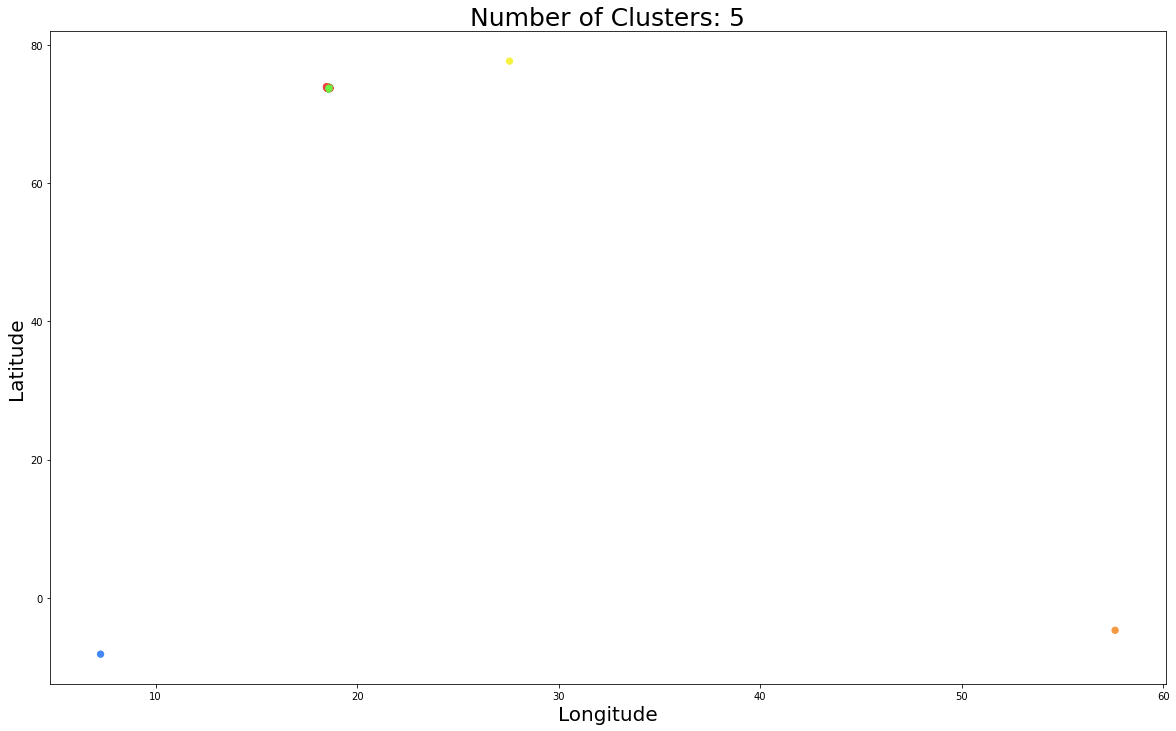

In [ ]:
def plot_gmm(n):
    # Train a GMM and plot the results 
    # Parameters
    n : int
        # Number of clusters
    #Fit gmm and get labels
    x = data[['Latitude','Longitude']].values
    gmm = sm.GaussianMixture(n_components=n, random_state=11,n_init=5)
    labels = gmm.fit(x).predict(x)
    
    #assign a colour to each label
    colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']
    c = [colour[l] for l in labels]
    
    #scatter plot
    plt.figure(figsize=(20, 12))
    plt.scatter(x=x[:, 0], y=x[:, 1], c=c, s=40, cmap='Set1', zorder=1)
    plt.title('Number of Clusters: {}'.format(n),size=25)
    plt.xlabel('Longitude',size=20)
    plt.ylabel('Latitude',size=20)
    
plot_gmm(5)

Fitting the GMM

In [ ]:
# Get gmm predictions
x = data[['Longitude','Latitude']].values
gmm = sm.GaussianMixture(n_components=5, random_state=11,n_init=5)
labels = gmm.fit(x).predict(x)

#create folium map 
m = folium.Map(
    location=[18.590904, 73.753085],
    zoom_start=12,
    tiles='stamen terrain' # other tiles - stamen toner, Mapbox Bright
)

colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5'] # red = 5 stars, green =4 stars, orange = 3 stars, yellow= 2, blue=1, purple=0

#add markers to map 
for i in range(len(x)):
    lon = x[i][0]
    lat = x[i][1]
    label = labels[i]
    
    #assign colour based on label 
    c = colour[label]
    
    #add marker
    folium.CircleMarker(location=[lat,lon],
                        radius=2,
                        color=c,
                        fill_color=c).add_to(m) 

#display map
m